# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    data.head()
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
data.head()


Wholesale customers dataset has 440 samples with 6 features each.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [5]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [6]:
# TODO: Select three indices of your choice you wish to sample from the dataset
# print data[data['Fresh'] == 112151.000000]

indices = [181, 200, 121]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,112151,29627,18148,16745,4948,8550
1,3067,13240,23127,3941,9959,731
2,4020,3234,1498,2395,264,255


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

In [7]:
display(samples - data.mean().round())
display(samples - data.median().round())

# import matplotlib.pylab as pylab
# pylab.rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session

# data.hist(alpha=0.5, bins=50)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,100151.0,23831.0,10197.0,13673.0,2067.0,7025.0
1,-8933.0,7444.0,15176.0,869.0,7078.0,-794.0
2,-7980.0,-2562.0,-6453.0,-677.0,-2617.0,-1270.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,103647.0,26000.0,13392.0,15219.0,4132.0,7584.0
1,-5437.0,9613.0,18371.0,2415.0,9143.0,-235.0
2,-4484.0,-393.0,-3258.0,869.0,-552.0,-711.0


**Answer:**

Sample 1(No. 181 in the dataset): This customer is select deliberately as it is the one with most Fresh consumed. The amount of milk it consumed is at least larger then 75% of all the samples, so as the amount Frozen, Grocery and  Delicatessen. The establishment of this consumer could be a restaurant, probably may focus on fresh food.

Sample 2(No. 200 in the dataset): The amount of Milk, Grocery, Frozen and Detergents Paper are 7444, 15176, 869,	7078 larger than mean and 9613, 18371, 2415, 9143 larger than median. This shows that this facility consume large amounts of these goods. This establishment could be a restaurant for its consumption pattern.

Sample 3(No. 399 in the dataset): As the given table above, this customer consume less amount of almost all kinds of product than mean and median. However, it consumes 869 more units of frozen than median. This indicate the size of this establishement should be small. It could be a small grocery store, which sells variety kinds of frozen food. 




### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [16]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
features = ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicatessen']
for feature in features:
    selected_feature = feature
    y = data[selected_feature]
    new_data = data.copy().drop(selected_feature, axis=1).as_matrix()
    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.25, random_state = 7)
    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state = 3)
    regressor = regressor.fit(X_train, y_train)
    # TODO: Report the score of the prediction using the testing set
    print "%20s"%(feature), regressor.score(X_test, y_test)

               Fresh -0.682570065233
                Milk -2.25000063945
             Grocery 0.715707841028
              Frozen -2.56630381163
    Detergents_Paper 0.712545427705
        Delicatessen -0.511372944919


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

At first, "Detergents_Paper" was selected to be predicted with other features. The score of this feature is about 0.7, which indicated that it can be effectively reconstructed with other features. So this feature would be not necessary for indentifying customers' habits as it is reconstructable from other features.

A 'for loop' was later constructed to observe all the features. The results were shown above. Grocery and Detergents Paper are the two features which can be effectively reconstructed with other features. The result of each time running this for loop is different. However, it was noticed that "Detergents_Paper" and "Grocery" almost alwas have a positive score. Sometimes the score of "Milk" can also be positive.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

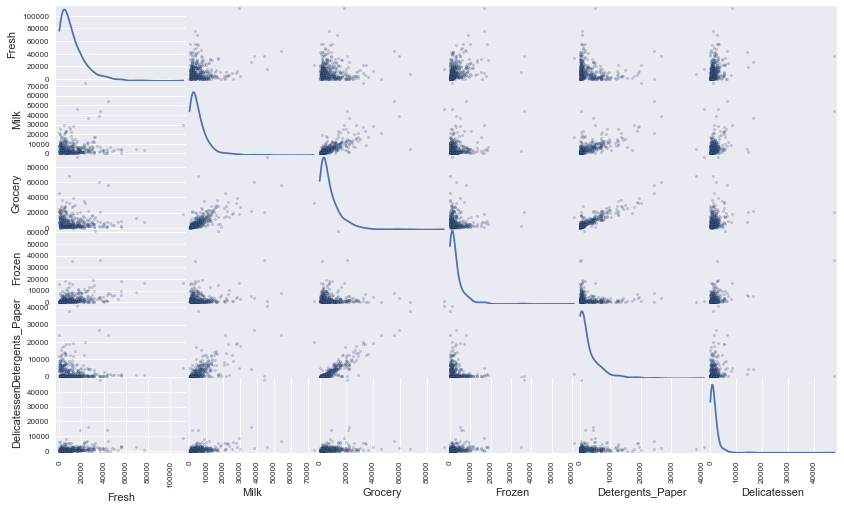

In [17]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

It can be observed that "Detergents_Paper" and "Grocery" have linear relationship. The "milk" also have observable linear realtionship with "Detergents_Paper" and "Grocery", this may explain that the score for milk sometimes turn out to be positive. This plot matrix confirmed my suspicions.
The data of all 6 features are right skewed and not normally distributed.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

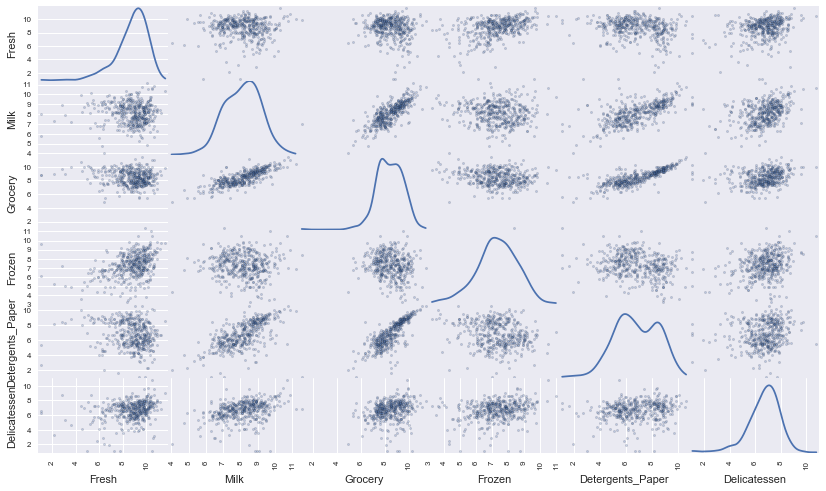

In [18]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [19]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,8.299037,8.081475,7.311886,7.781139,5.575949,5.541264


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [20]:
# For each feature find the data points with extreme high or low values
outliers  = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outliers += list(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index)
# OPTIONAL: Select the indices for data points you wish to remove
# print outliers
outliers =list( set([x for x in outliers if outliers.count(x) > 1]) )
print outliers
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[128, 65, 66, 75, 154]


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

The outliers of each feature are selected and appended to a list. Any index appears in this list for more than or equal two times should be considered as the outliers for more than one feature. The outliers in a very small data set may bring negative impact to the result. However, the outliers may also contains some useful information. Here only the outliers for more than one feature were removed.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

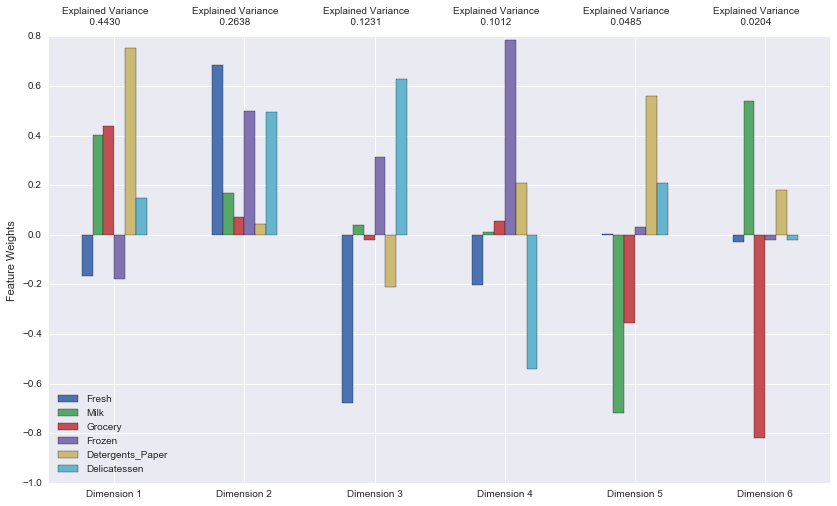

In [39]:
# TODO: Apply PCA to the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(good_data)
# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
##### How much variance in the data is explained in total by the first and second principal component?
0.7068

The first PC explained 0.4430 variance of the data. This component is highly correlated with Detergents Paper, Grocery and Milk. As the Detergents Paper is the highest component, the first component may discribe how likely this establishment need cleaning.

The second PC explained 0.2638 variance of the data. This PC is highly correlated with Fresh, Frozen and Delicatessen. This could discribe how likely this is a food market.

##### What about the first four principal components?
The first four pricipal components covers 0.9311 of the variance. However, 0.7068 out of 0.9311 is explained by the first 2 components.

The third component is correlated with Fresh and Delicatessen. It represents the negative correlated relationship between Fresh and Delicatessen, where a incresing amount of Delicatessen will lead an increasing of the 3rd PC and a decreasing of Delicatessen.

The forth component represents the nagative correlation betweeen Frozen and Delicatessen. A incresing amount of Delicatessen will lead an increasing of the 4th PC and a decreasing of Frozen.




### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [22]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.1899,4.8605,0.0008,0.4827,-0.5041,0.1988
1,2.9903,0.3645,0.2521,1.5653,-0.1922,-0.1244
2,-1.6168,-0.8030,0.0153,0.7586,-0.4681,0.7209


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [23]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [24]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.1899,4.8605
1,2.9903,0.3645
2,-1.6168,-0.8030


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

###### Adavantage of K-Means:
K-Means clustering method take a time complexity of O(n) while many other clustering method takes quadratic. Also, K-Means is a general purpose clustering method, which means it is likely to have a decent performance in many cases.

###### Adavantage of Gaussian Mixture Model:
The most significant advantage of GMM is that it's a soft clustering method, which may assign a sample to more then one cluster with the probability calculated.
    
###### Method chosen for this project:

As this project is to cluster each sample to a type of customer, soft clustering could be a useful feature here. As the type of customers could get vague sometimes. For example, the restaurant is similar to a cafeteria in many cases.
    
As a result, GMM is selected to be use as the clustering method for this project.
    

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [25]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

i_and_score = []
covariance_types = ['spherical', 'tied', 'diag', 'full']

for i in range(2,30):
    for covariance_type in covariance_types:
        clusterer = GMM(n_components=i, covariance_type=covariance_type).fit(reduced_data)

        # TODO: Predict the cluster for each data point
        preds = clusterer.predict(reduced_data)

        # TODO: Find the cluster centers
        centers = clusterer.means_

        # TODO: Predict the cluster for each transformed sample data point
        sample_preds = clusterer.predict(pca_samples)
#         print sample_preds
        # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
        score = silhouette_score(reduced_data, preds)
        print 'n_components, covariance_type, score: %d  %15s  %f'%(i, covariance_type, score)
        i_and_score.append( (i, covariance_type, score) )

print 'The best combination of parameters is found to be:', max(i_and_score, key = lambda x:x[2])
    
# clusterer = GMM(n_components=4).fit(reduced_data)

# # TODO: Predict the cluster for each data point
# preds = clusterer.predict(reduced_data)

# # TODO: Find the cluster centers
# centers = clusterer.means_

# # TODO: Predict the cluster for each transformed sample data point
# sample_preds = clusterer.predict(pca_samples)
# print sample_preds
# # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
# score = silhouette_score(reduced_data, preds)
# print score

n_components, covariance_type, score: 2        spherical  0.423837
n_components, covariance_type, score: 2             tied  0.422570
n_components, covariance_type, score: 2             diag  0.411819
n_components, covariance_type, score: 2             full  0.411750
n_components, covariance_type, score: 3        spherical  0.400207
n_components, covariance_type, score: 3             tied  0.383626
n_components, covariance_type, score: 3             diag  0.373561
n_components, covariance_type, score: 3             full  0.399047
n_components, covariance_type, score: 4        spherical  0.337403
n_components, covariance_type, score: 4             tied  0.322288
n_components, covariance_type, score: 4             diag  0.309881
n_components, covariance_type, score: 4             full  0.284879
n_components, covariance_type, score: 5        spherical  0.265587
n_components, covariance_type, score: 5             tied  0.291494
n_components, covariance_type, score: 5             diag  0.28

In [26]:
clusterer = GMM(n_components=2, covariance_type='spherical').fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
#         print sample_preds
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
# score = silhouette_score(reduced_data, preds)

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

The range of attemped number of components(clusters) is 2 to 29. Two clusters seems to give the best silhouette score 0.424 with covariance type set to spherical.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

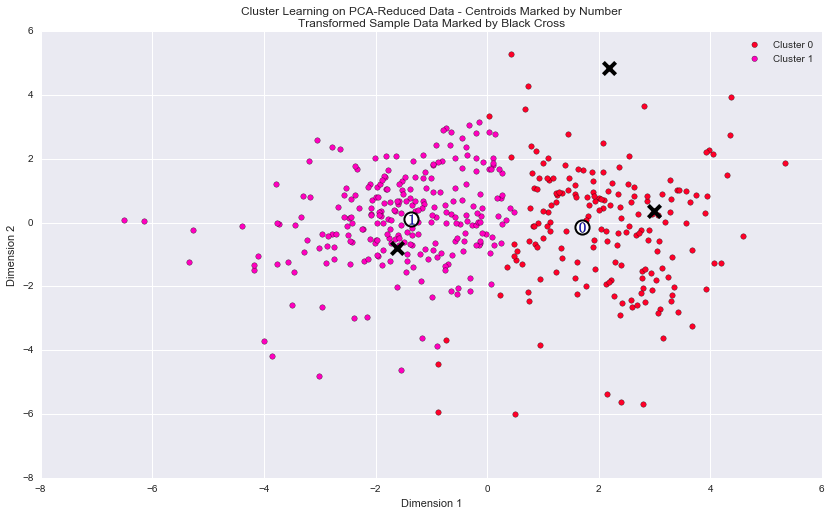

In [27]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4394.0,6567.0,9871.0,1046.0,3210.0,975.0
Segment 1,8698.0,1992.0,2613.0,2045.0,322.0,694.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-7606.0,771.0,1920.0,-2026.0,329.0,-550.0
Segment 1,-3302.0,-3804.0,-5338.0,-1027.0,-2559.0,-831.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-4110.0,2940.0,5115.0,-480.0,2394.0,9.0
Segment 1,194.0,-1635.0,-2143.0,519.0,-494.0,-272.0


Fresh               8504.0
Milk                3627.0
Grocery             4756.0
Frozen              1526.0
Detergents_Paper     816.0
Delicatessen         966.0
dtype: float64

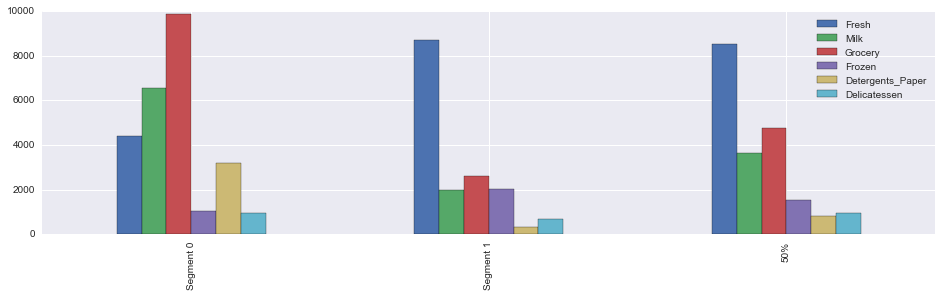

In [35]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

true_centers_dup = true_centers.append(data.describe().ix['50%'])
true_centers_dup.plot(kind = 'bar', figsize = (16, 4))

display(true_centers - data.mean().round())
display(true_centers - data.median().round())
display(data.median().round())

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

##### Compare with the data set:
Comparing the two segments with the medians of the whole dataset, Segment 0 consumes a large mount of Grocery, Milk and detergents/papers, less amount of Frozen, while Segment 1 consumes large amount of Fresh and Frozen, less amount of Grocery and Detergents/papers. The median of the amount of the population's Deter_Paper is 816. Segment 0 consumed 3210, 2394 more than the dataset's median value. Segment 1 consumed 322, 494 less then the dataset median value.

##### Compare bewteen the segments:
The most significant difference between these two segments is the number of Detergents Paper, which Segment 0 consumes about 10 times of Segment1. It can be interpreted that, the establishments of that fit S0 should have a lot of cleaning work. Thus, a possible assumption is that these establishments could be restaurant and cafeterias.

##### Conculsion:
As a result, Segment 1 should be establisments which will not provide services in house, which means they could be supermarkets and grocery shops.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1
    Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  112151  29627    18148   16745              4948          8550
1    3067  13240    23127    3941              9959           731
2    4020   3234     1498    2395               264           255


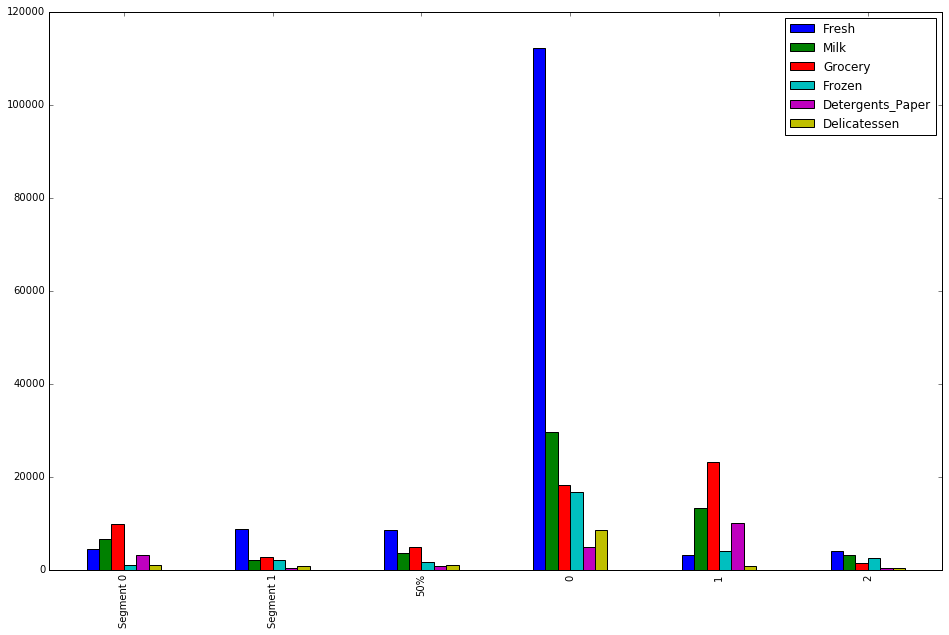

In [82]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    
    
print samples
true_centers_dup = true_centers_dup.append(samples)
true_centers_dup.plot(kind = 'bar', figsize = (16, 10))

**Answer:**

Sample 0 is guessed to be a restaurant and it is predicted to Segment 0, the guess and prediction are consistent.
However, this prediction is hard here. This sample consumes a significant large amout of Fresh, but also many detergents/paper. Though the model clustered it to Segment 0, it also could be in Segment 1.


Sample 1 is guessed to be a cafeteria and it is predicted to Segment 0, the guess and prediction are consistent.
It fit the pattern of Segment 0 that consume large amounts of Grocery and detergents/paper.


Sample 2 is guessed to be a grocery store and it is predicted to Segment 1, the guess and prediction are consistent.
This sample fit the pattern of Segment 1 that consumes more Fresh than other products.  

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**

During the A/B test, it is necessary to keep there is only one changing variable in the test. In this case, the change of the delivery frequency. To ensure there's no other changing variables, the result should be compare within the same segment. For example, as we now have the tool to clustering the customers, we could select 50 samples from each cluster make the change and ask for feedbacks. Then we can found out the customers react to this change and also found out which kind customer is affected the most.

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**

As we now have the clustering tool, we have one more feature of the customer: their segment. This can be used as a input feature during the supervised learning.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

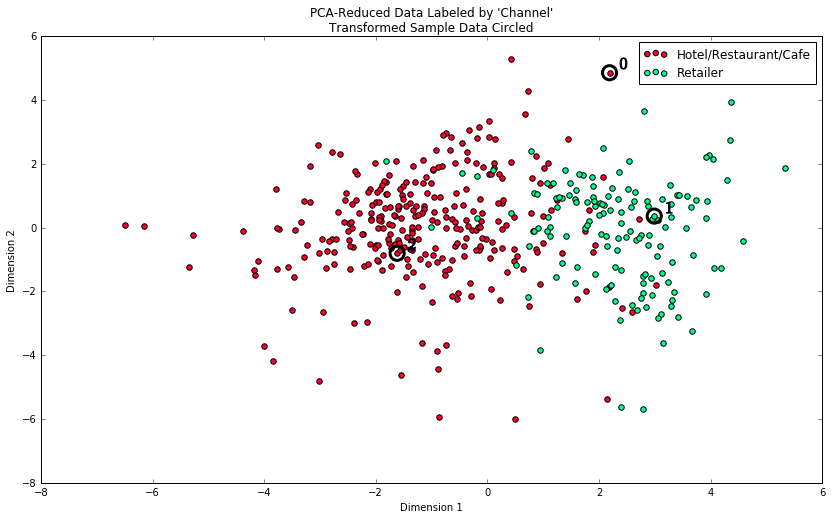

In [83]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

Comparing the two generated graphs, HoReCa corresponds to Cluster 1 and Retail corressponds to Cluster 0.

Sample 0 was clustered into Cluster 0. The real segment of this sample is HoReCa, which is different with the prediction. However, it can be observed from the last figure that, Sample 0 located at the right hand side of the plot. Even we are using GMM, which is a soft clustering method, the probability of sample 0 to be part of HoReCa still looks smaller than Retailer. This sample could be hard to predict as it was discussed above that is fit both the pattern of Segment 0 and 1.

Sample 1, which belongs to Retailer cluster, was predicted to be Cluster 0 correctly.

Sample 2, which belongs to HoReCa is correctly predicted to Cluster 1.

It can be observed from the last plot that the two clusters has 'overlapping area'. This is a not precise description since for a distribution, for example Gaussian, the area could be infinity, which means two distributions in the same space must have overlaps. However, this could be an analog of real life case: for example, in some cafes like Starbucks, the are selling snacks, mugs and food/drink to go. This is similar to Retailers' behavior. An assumption for this situation could be, that the sample close to the centers of the clusters are likely to be purely 'Retailers' or 'Hotels/Restaurants/Cafes'. The samples at the "overlapping area" of the two clusters, may not be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes'.

Given the last plot, we can be sure now that the GMM is better then K-Means because the it would be impossible for K-Means to cluster the green dot in the left hand side of the plot. The performance of this clustering model is good around the clustering centers and poor at the edges.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.